# Pitch Type Classification and Clustering
#### Automate clustering of an individual pitcher's arsenal.

## Background
#### Trackman
Trackman ia a radar-based system installed in all Major League Baseball stadiums that records various measures on every pitch thrown. The system records the location of the pitch 100 times per second, and uses those locations to calculate measures on each pitch such as velocity,  break (horizontal and vertical movement off the pitch's initial trajectory) spin rate, spin direction and many others.

#### Pitch Types
Almost every pitch thrown in Major League Baseball is intended to be one of 8 pitch types, and most individual pitchers use between 3 to 5 of these pitch types (known as that pitcher's "arsenal"). As pitchers do not declare what pitch type they are throwing, traditionally the types are tagged manually by a trained eye. However, information about pitch types can be gleaned from the measures in the Trackman data as well, and the precise measures in Trackman might lead to more accurate classifications than manual tagging.

#### Clustering and classification
Trackman data already has manual labels, so in theory a classification algorithm could be used without having re-cluster all pitches. But an automated clustering process can be useful to remove the subjectivity in pitch type labeling. 
Furthermore, while the pitch clusters are known across baseball as a whole, clustering is useful on an individual pitcher basis as each individual pitcher's arsenal is unknown. So the first step to classifying a pithcer's arsenal is to group his individual pitches into specific pitch types, then a classification algorithm can label those pitch types.

## League-wide Clustering
We'll begin by clustering all pitches from the 2018 season.

In [1]:
import pandas as pd
tm = pd.read_csv("./2018_trackman_sample.csv").dropna(axis = 0) # remove rows with missing values
len(tm.index)

23132

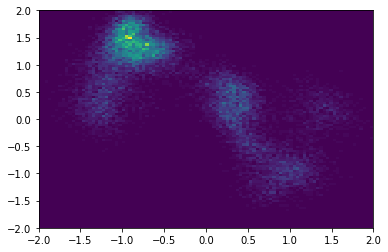

In [2]:
# plot density across horz break and vert break for right handers
import matplotlib.pyplot as plt
plt.hist2d(tm[tm.p_hand == "R"].horz_break
           ,tm[tm.p_hand == "R"].vert_break
           ,bins = [100,100]
          ,range = [[-2,2],[-2,2]])
plt.show()

In [3]:
tm.groupby(['pitch_type','pitch_name']).count().pitcher.sort_values(ascending = False)

pitch_type  pitch_name     
FF          4-Seam Fastball    9746
SL          Slider             4145
CH          Changeup           2645
FT          2-Seam Fastball    2330
FC          Cutter             1625
CU          Curveball          1275
KC          Knuckle Curve      1247
EP          Eephus              114
PO          Pitch Out             5
Name: pitcher, dtype: int64